# Algorytmy macierzowe - mnożenie macierzy
## Wykonali: Robert Kazimirek, Paweł Kruczkiewicz


**Numer ćwiczenia: 3**

*Temat:* Proszę napisać mnożenie macierzy rIGA i rIGA używając algorytmu mnożenia blokowego, i 
dobrać optymalną kolejność pętli oraz rozmiar bloków 

Treść ćwiczenia:

1. Proszę wybrać dwie możliwie największe macierze A i B ze swoich dwóch 
rodzin macierzy, takie żeby zgadzały się ich rozmiary, oraz przemnożyć je 
A*B swoim optymalnym algorytmem (tak duże macierze jakie da się w 
czasie kilku-kilkudziesięciu minut przemnożyć na Państwa laptopie) 
2. Proszę narysować schemat niezerowych wartości swoich dwóch macierzy 
(używając komendy spy(A), spy(B) MATLABa) oraz macierzy wynikowej 
A*B 
3. Proszę zmierzyć czas mnożenia tych wybranych dwóch dużych macierzy dla 
różnej kolejności pętli w algorytmie mnożenia macierzy. Proszę narysować 
tabelkę: kolejność pętli (6 możliwości) versus czasy mnożenia 
3. Proszę wybrać jedną kolejność pętli i następnie dla swoich dwóch macierzy 
A i B zmierzyć czasy mnożenia w algorytmie mnożenia blokowego.  Proszę 
narysować wykres: oś x rozmiar bloków, oś y czas mnożenia 
4. Proszę obliczyć liczbę operacji zmienno-przecinkowych koniecznych do 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
a = np.array

### Ad. 1
Jako macierze A i B wybraliśmy macierze wygenerowane przez podany na zajęciach skrypt `massmatrix.m`. W tym celu użyliśmy funkcji `massmatrix(2,nxx,2,2)`, gdzie nxx = {2,3,4}. Następnie wyniki zapisaliśmy w pliku o formacie csv. Poniższy kod wczytuje obie macierze jako `np.array` 

In [16]:
def get_matrix_from_csv(csv_file):
    return np.loadtxt(open(csv_file, "rb"), delimiter=",", skiprows=0)

In [20]:
A_16, B_16 = get_matrix_from_csv("riga.csv"), get_matrix_from_csv("riga.csv")
A_36, B_36 = get_matrix_from_csv("riga36.csv"), get_matrix_from_csv("riga36.csv")
#TODO dodać A_49 i B_49

input_matrices = [(A_16, B_16), (A_36, B_36)]

In [21]:
np.size(A_16, 0)

16

### Ad. 2
Poniżej przedstawiamy niezerowe pola wejściowych oraz wyjściowe macierzy. Fiolet oznacza niezerową wartość, żółty oznacza zerową. Do mnożenia macierzy wykorzystano wbudowany w bibliotekę numpy znak mnożenia macierzy

In [ ]:
def spy(matrix, label):
    mask = matrix == 0
    plt.matshow(mask)
    plt.title(label)
    plt.show()

In [ ]:
for A, B in input_matrices:
    n = np.size(A, 0)
    C = A@B
    
    spy(A, f"A, size={n}")
    spy(B, f"B, size={n}")
    spy(C, f"C, size={n}")
    


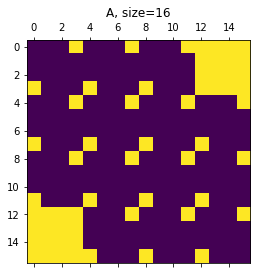

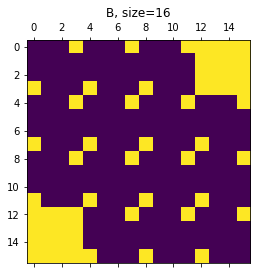

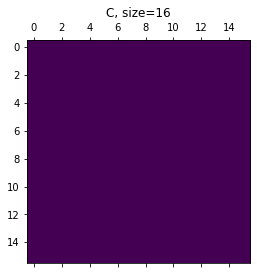

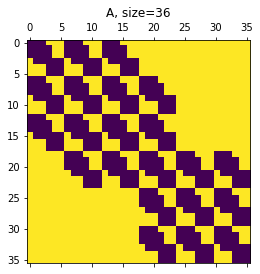

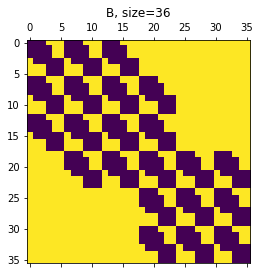

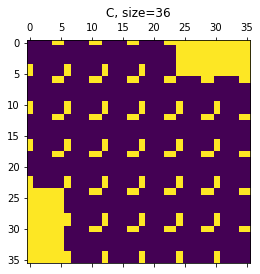

In [39]:
for A, B in input_matrices:
    n = np.size(A, 0)
    C = A@B
    
    spy(A, f"A, size={n}")
    spy(B, f"B, size={n}")
    spy(C, f"C, size={n}")
    
